# **Part I - Ford GoBike Data Exploration**
### **by Ameed Othman**

## **Introduction**
In this project, I explored the Ford GoBike dataset from February 2019, which includes details about over 183,000 bike trips in the San Francisco Bay Area. The dataset contains variables such as trip duration, start and end locations, user demographics, and membership information. Through this analysis, I aim to understand key patterns in trip durations, demographics of users, and other factors.

The analysis will be divided into three sections:
- Univariate Exploration: Where we explore the distributions of individual variables.
- Bivariate Exploration: Where we explore relationships between pairs of variables.
- Multivariate Exploration: Where we explore relationships involving more than two variables.

---

## **Preliminary Wrangling**

### 1. **Loading the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### 2. **Initial Inspection of the Dataset**

- Display the first few rows of the dataset:

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


- Check the shape of the dataset:

In [4]:
df.shape

(183412, 16)

- Check the data types of the columns:

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

- Summary statistics of the dataset:

In [6]:
df.describe(include='all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
count,183412.000000,183412,183412,183215.000000,183215,183412.000000,183412.000000,183215.000000,183215,183412.000000,183412.000000,183412.000000,183412,175147.000000,175147,183412
unique,NaN,183401,183397,NaN,329,NaN,NaN,NaN,329,NaN,NaN,NaN,2,NaN,3,2
top,NaN,2019-02-25 08:52:07.5820,2019-02-11 08:03:22.6020,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No
freq,NaN,2,2,NaN,3904,NaN,NaN,NaN,4857,NaN,NaN,NaN,163544,NaN,130651,166053
mean,726.078435,NaN,NaN,138.590427,NaN,37.771223,-122.352664,136.249123,NaN,37.771427,-122.352250,4472.906375,NaN,1984.806437,NaN,NaN
std,1794.389780,NaN,NaN,111.778864,NaN,0.099581,0.117097,111.515131,NaN,0.099490,0.116673,1664.383394,NaN,10.116689,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.317298,-122.453704,3.000000,NaN,37.317298,-122.453704,11.000000,NaN,1878.000000,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,37.770083,-122.412408,44.000000,NaN,37.770407,-122.411726,3777.000000,NaN,1980.000000,NaN,NaN
50%,514.000000,NaN,NaN,104.000000,NaN,37.780760,-122.398285,100.000000,NaN,37.781010,-122.398279,4958.000000,NaN,1987.000000,NaN,NaN
75%,796.000000,NaN,NaN,239.000000,NaN,37.797280,-122.286533,235.000000,NaN,37.797320,-122.288045,5502.000000,NaN,1992.000000,NaN,NaN


### **What is the structure of your dataset?**
- The dataset consists of 183,412 rows and 16 columns. Each row represents a trip taken with the Ford GoBike system, including trip duration, start and end station details, user type, and demographic information.

### **What is/are the main feature(s) of interest in your dataset?**
- The main features of interest are the trip durations, user types, and user demographics (e.g., gender, age).

### **What features in the dataset do you think will help support your investigation into your feature(s) of interest?**
- The columns that help support the investigation are `duration_sec`, `user_type`, `member_gender`, `member_birth_year`, and trip-related columns (like start and end stations).

---

## **Univariate Exploration**

In this section, I will explore the distributions of individual variables to understand their behavior and identify any potential outliers or patterns.

### **1. Distribution of Trip Durations**

- First, I will explore the trip durations to see how most trips are distributed.

(0.0, 5000.0)

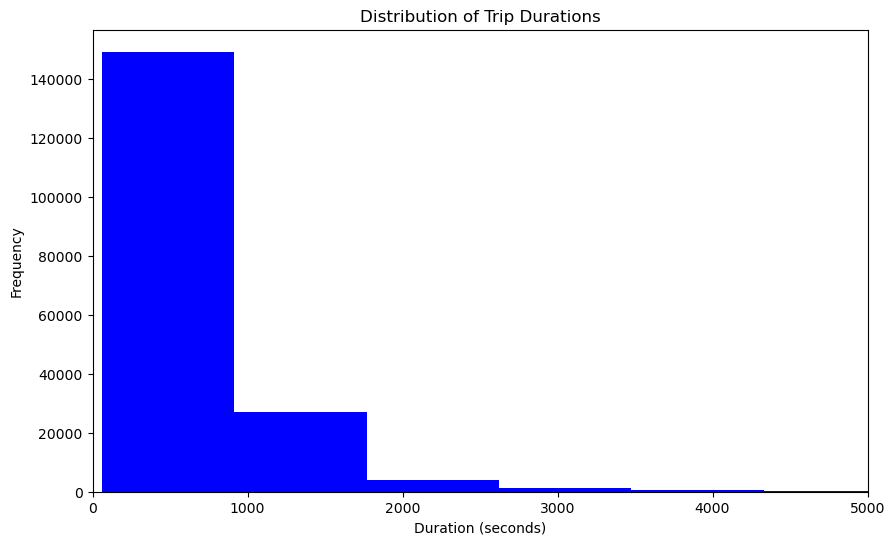

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration_sec'], bins=100, color='blue')
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.xlim([0, 5000])  # Focus on trips with duration less than 5000 seconds

### **2. Distribution of User Types**

Text(0, 0.5, 'Count')

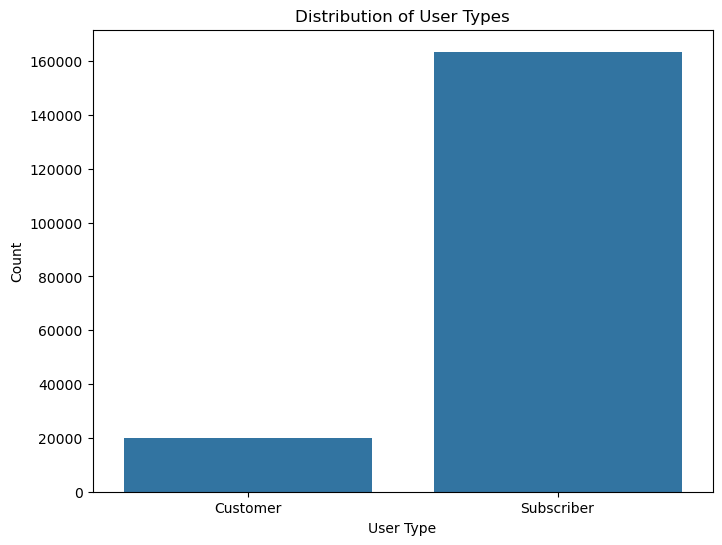

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='user_type')
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Count')

### **3. Distribution of User Age**

In [9]:
current_year = 2019
df['age'] = current_year - df['member_birth_year']

Text(0, 0.5, 'Frequency')

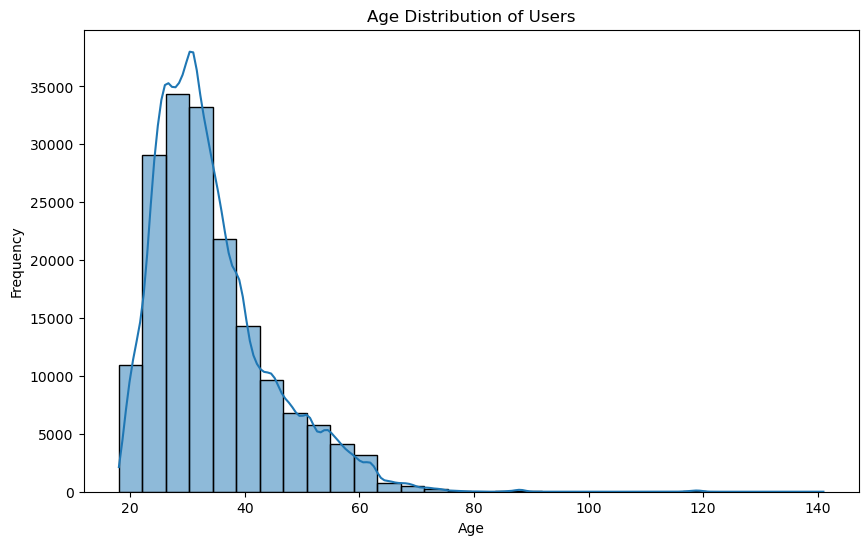

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')

### **Observations**:
- **Trip Durations**: Most trips are short, with the majority clustered below 1000 seconds. There are a few longer trips, which could be outliers or special cases.
- **User Types**: Subscribers significantly outnumber customers.
- **Age Distribution**: Most users are between 20 and 40 years old, with fewer users above 50. Some users over 100 years old seem to be data anomalies.

---

## **Bivariate Exploration**

In this section, I will explore relationships between pairs of variables.

### **1. Trip Duration by User Type**

- Now, I’ll check how trip durations differ between Customers and Subscribers.

Text(0, 0.5, 'Trip Duration (seconds)')

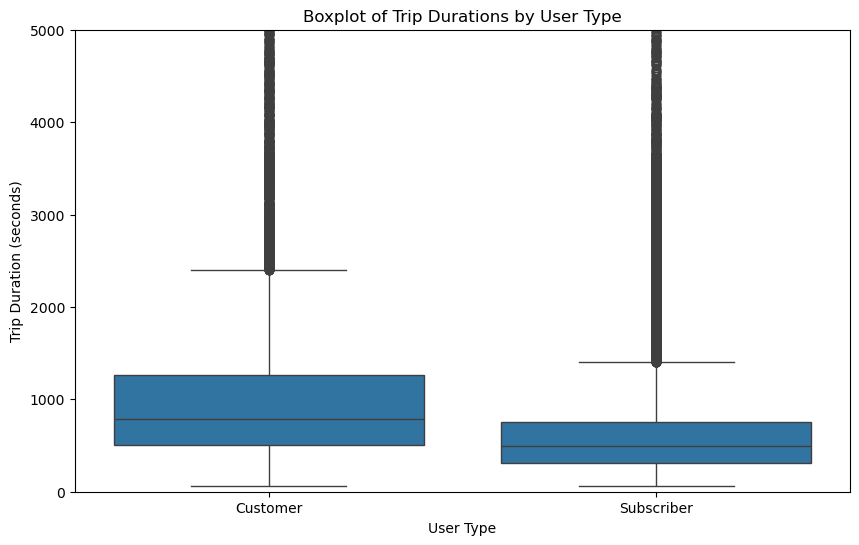

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user_type', y='duration_sec')
plt.ylim([0, 5000])
plt.title('Boxplot of Trip Durations by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')

### **2. Trip Duration by Gender**

Text(0, 0.5, 'Trip Duration (seconds)')

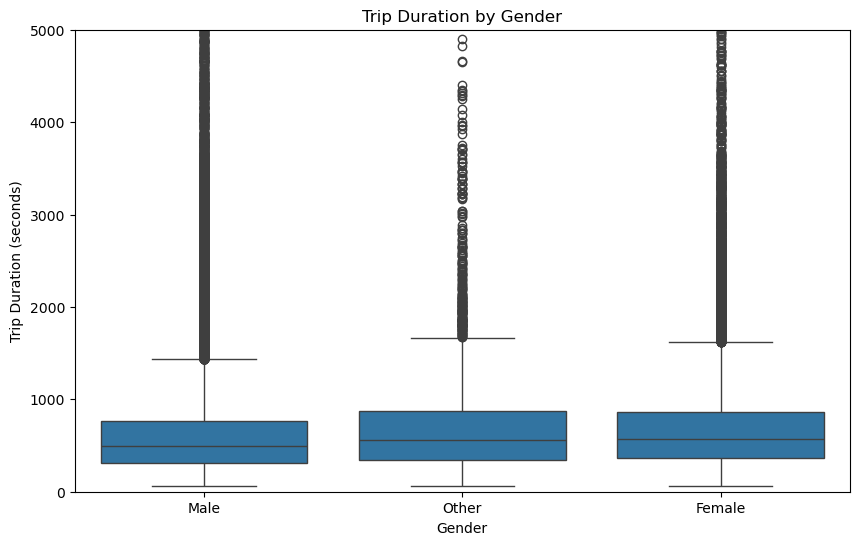

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='member_gender', y='duration_sec')
plt.ylim([0, 5000])
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (seconds)')

### **3. Scatterplot: Age vs Trip Duration**

(0.0, 5000.0)

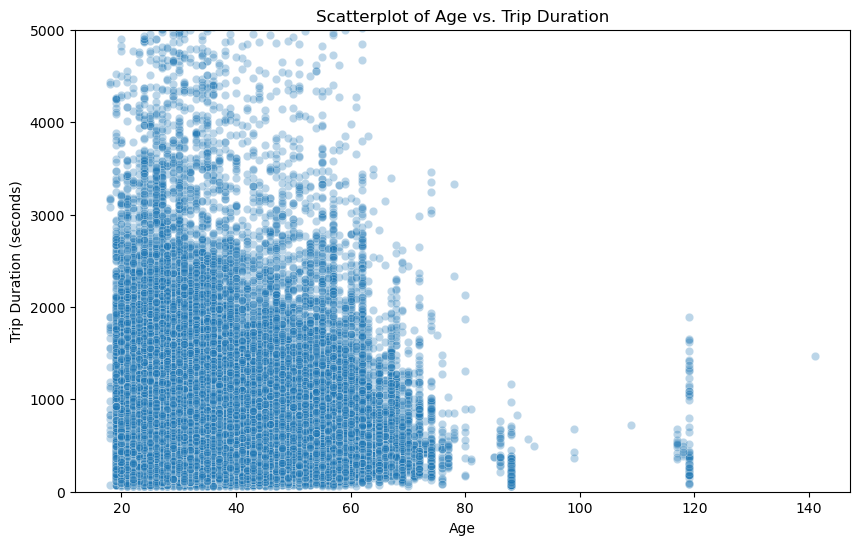

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='duration_sec', alpha=0.3)
plt.title('Scatterplot of Age vs. Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip Duration (seconds)')
plt.ylim([0, 5000])

### **4. Clustered Bar Chart: User Type by Gender**

- **Clustered Bar Chart** to analyze the distribution of user types across genders.

Text(0, 0.5, 'Count')

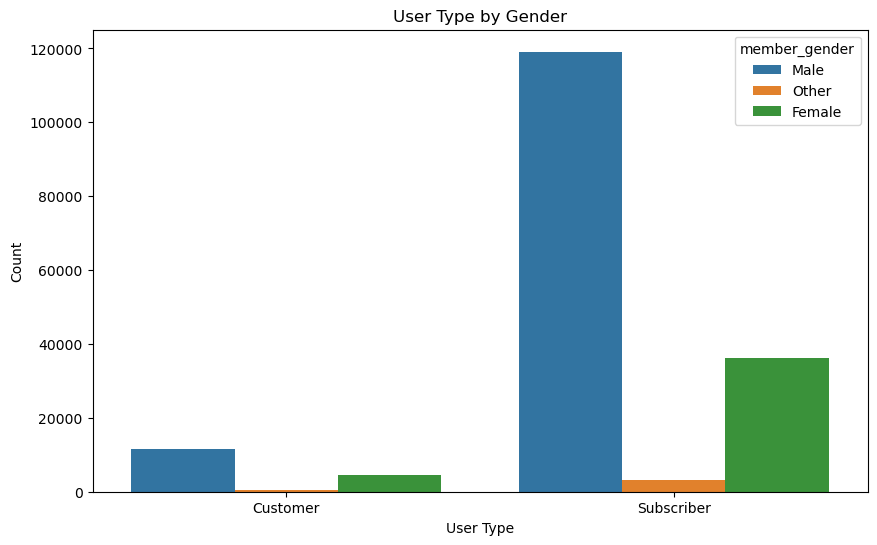

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='user_type', hue='member_gender')
plt.title('User Type by Gender')
plt.xlabel('User Type')
plt.ylabel('Count')

### **Observations**:
- **Trip Durations by User Type**: Customers tend to have longer trips on average compared to Subscribers. This could be due to differences in trip purposes (e.g., tourists vs. commuters).
- **Trip Durations by Gender**: Female users tend to take slightly longer trips than male users on average. The "Other" category has more variability, but due to its small size, the data might not be representative.
- **Age vs Trip Duration**: Younger users (20–40 years) tend to take more trips, but there isn’t a strong correlation between age and trip duration.
- **Clustered Bar Chart (User Type by Gender)**: Male users are the majority in both Customer and Subscriber groups, but there are more female Subscribers than female Customers.

---

## **Multivariate Exploration**

In this section, I will explore relationships between three or more variables to gain further insights.

### **1. Relationship between Trip Duration, Gender, and User Type**

Text(0.5, 0.98, 'Trip Duration by Gender and User Type')

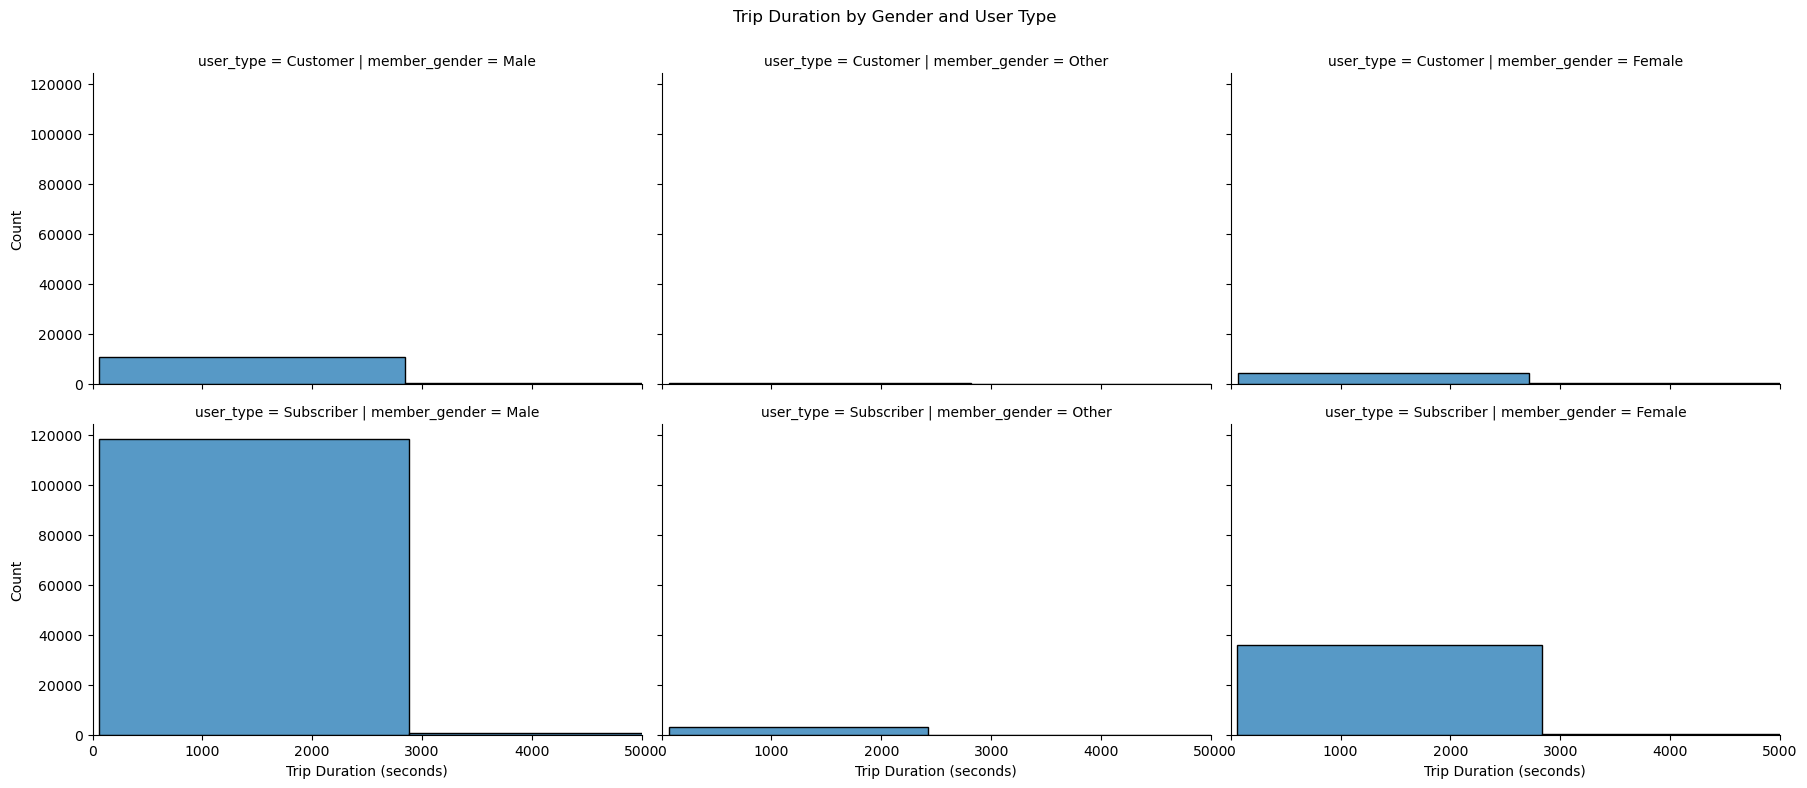

In [15]:
g = sns.FacetGrid(df, col="member_gender", row="user_type", height=4, aspect=1.5)
g.map(sns.histplot, "duration_sec", bins=30)
g.set_axis_labels("Trip Duration (seconds)", "Count")
g.set(xlim=(0, 5000))  # Focus on trips with duration less than 5000 seconds
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trip Duration by Gender and User Type')

### **2. Plot Matrix: Age, Trip Duration, and User Type**

- A **Plot Matrix** to explore relationships between `age`, `trip duration`, and `user_type`.

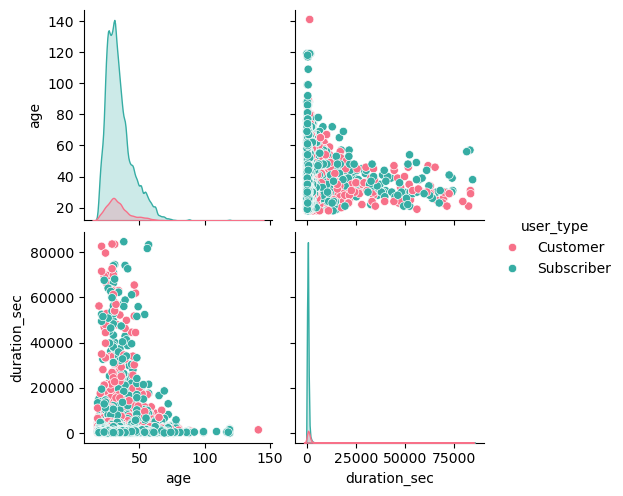

In [16]:
sns.pairplot(df[['age', 'duration_sec', 'user_type']], hue='user_type', diag_kind='kde', palette='husl')

### **Observations**:
- **Trip Duration by Gender and User Type**: Subscribers, regardless of gender, tend to take shorter trips. Female customers have slightly longer trips than male customers. 
- **Plot Matrix**: This plot matrix reveals the relationships between trip duration, user type, and age. The majority of users are under the age of 50, with Subscribers being the predominant user type across age groups. Most trips tend to have shorter durations, especially for Subscribers. Customers, on the other hand, exhibit a wider spread in trip durations, with some notable outliers having much longer trips. There's also a visible concentration of trips for both user types under 20,000 seconds, but Customers show more variation in longer trips.

---

## **Conclusions**

Through this analysis of the **Ford GoBike** dataset, I observed several key trends:
1. **Subscribers** take shorter trips on average compared to **Customers**.
2. There is a **significant gender imbalance** in bike usage, with male users dominating the dataset.
3. **Age** doesn’t have a strong correlation with trip duration, but younger users tend to take more frequent trips.
4. **Customers** generally take longer trips, while **Subscribers** have shorter, more consistent trips, likely due to differences in trip purposes.

---

### **Next Steps**
- Investigate the outliers in trip durations, especially the very long trips.
- Analyze potential seasonal patterns in bike usage.
- Explore user behavior at specific stations (e.g., popular start and end locations).